In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import nltk
import regex as re
from nltk.corpus import stopwords
from sklearn.linear_model import LogisticRegression
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
%matplotlib inline

In [32]:
df = pd.read_csv('../data_csv/eda_df.csv')

In [33]:
df.head()

,title,subreddit
0,What do you guys enjoy about your job?,1
1,"Why the rich stay rich, maybe",1
2,Speechless and sad,1
3,Misogynistic Guy Demands A Pie Chart,1
4,Customer angry refunds are not instantaneous,1


In [34]:
X = df['title']
y = df['subreddit']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [36]:
tvec = TfidfVectorizer()

In [37]:
### this code was originally from a lesson that Brendan McDonnell (Chicago) taught ###
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, y=None, **fit_params):
        return X.toarray()

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('gnb', GaussianNB())
])
params = {
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2), (2,3)],
    'tvec__max_features': [1000, 2500, 5000],
}
gs = GridSearchCV(pipe, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [38]:
print(gs.best_score_)

0.6565000000000001


In [39]:
gs.best_params_

{'tvec__max_features': 5000,
 'tvec__ngram_range': (1, 1),
 'tvec__stop_words': None}

In [40]:
gauss_best_model = gs.best_estimator_

In [41]:
gauss_best_model.score(X_train, y_train)

0.868

In [42]:
gauss_best_model.score(X_test, y_test)

0.636

In [43]:
print(f'Score on Gaussian title training set: {gs.score(X_train, y_train)}')
print(f'Score on Gaussian title testing set: {gs.score(X_test, y_test)}')

Score on Gaussian title training set: 0.868
Score on Gaussian title testing set: 0.636


In [44]:
preds = gs.predict(X_test)
preds

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

C:\Users\blang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


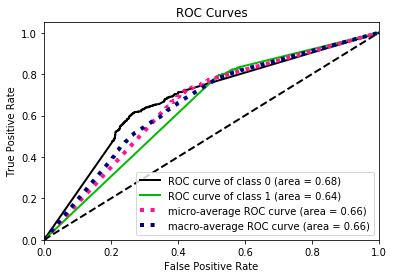

In [45]:
import scikitplot as skplt #to make things easy
y_pred_proba = gs.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

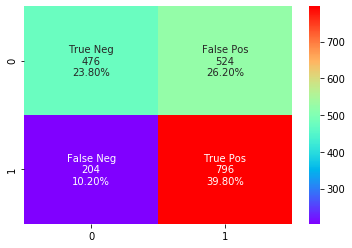

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
##### this code was found on https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='rainbow')

In [47]:
text_df = pd.read_csv('../data_csv/clean.csv')

In [48]:
text_df.head(3)

,title,selftext,subreddit
0,What do you guys enjoy about your job?,"Call centre work is fucking hard, and for the ...",1
1,"Why the rich stay rich, maybe",TLDR at end \n\nI work in a credit card call c...,1
2,Speechless and sad,I am an occasional customer of various call ce...,1


In [49]:
X = text_df['selftext']
y = text_df['subreddit']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=42)

In [51]:
tvec = TfidfVectorizer()

In [52]:
### this code was originally from a lesson that Brendan McDonnell (Chicago) taught ###
from sklearn.base import TransformerMixin
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None, **fit_params):
        return self
    def transform(self, X, y=None, **fit_params):
        return X.toarray()

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('to_dense', DenseTransformer()),
    ('gnb', GaussianNB())
])
params = {
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1, 1), (1, 2)],
    'tvec__max_features': [1000, 2500, 5000],
}
gs = GridSearchCV(pipe, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('tvec',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        no

In [53]:
print(gs.best_score_)
gs.best_params_

0.9373264886539223


{'tvec__max_features': 2500,
 'tvec__ngram_range': (1, 2),
 'tvec__stop_words': None}

In [54]:
print(f'Score on Gaussian text training set: {gs.score(X_train, y_train)}')
print(f'Score on Gaussian text testing set: {gs.score(X_test, y_test)}')

Score on Gaussian text training set: 0.9605761940864291
Score on Gaussian text testing set: 0.9446969696969697


C:\Users\blang\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


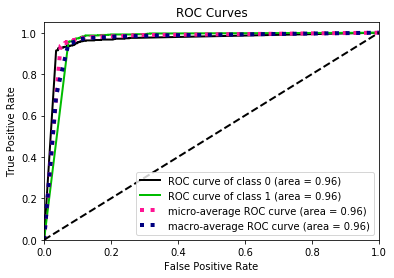

In [55]:

import scikitplot as skplt #to make things easy
y_pred_proba = gs.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba)
plt.show()

In [56]:
preds = gs.predict(X_test)

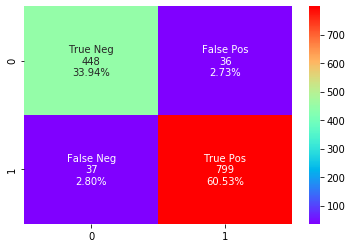

In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, preds)
##### this code was found on https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                cm.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='rainbow')